# Импортируем необходимые библиотеки для работы с данными и моделями машинного обучения

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Загружаем данные из CSV файла

In [2]:
df = pd.read_csv("dataset_salary_2024_encoded.csv")

# Выбираем признаки (features) и целевую переменную (target)
# В данном случае мы используем 'employment_type_encoded' в качестве целевой переменной,
# и несколько других признаков для обучения моделей
X = df[['employment_type_encoded', 'company_location_encoded', 'salary_scaled', 'work_year_scaled']]
y = df['employment_type_encoded']

# Настраиваем KFold для кросс-валидации

In [3]:
# n_splits=5 означает, что данные будут разделены на 5 частей (фолдов)
# shuffle=True перемешивает данные перед разделением
# random_state=42 фиксирует случайное состояние для воспроизводимости результатов
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Определяем функцию для оценки модели с использованием кросс-валидации

In [4]:
def evaluate_model(model, X, y):
    accuracies = []  # Список для хранения значений точности
    precisions = []  # Список для хранения значений точности (precision)
    recalls = []     # Список для хранения значений полноты (recall)
    f1s = []         # Список для хранения значений F1-меры

    # Проходим по каждому фолду
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Обучаем модель на обучающем наборе данных
        model.fit(X_train, y_train)

        # Предсказываем значения для тестового набора данных
        y_pred = model.predict(X_test)

        # Вычисляем метрики и добавляем их в соответствующие списки
        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        recalls.append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
        f1s.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

    # Возвращаем средние значения метрик
    return np.mean(accuracies), np.mean(precisions), np.mean(recalls), np.mean(f1s)

# Создаем и обучаем модель Decision Tree без настройки гиперпараметров

In [5]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_metrics = evaluate_model(dt_clf, X, y)

In [6]:
# Определяем сетку гиперпараметров для настройки Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Используем GridSearchCV для подбора лучших гиперпараметров
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Извлекаем лучшую модель по результатам поиска
best_dt_clf = grid_search.best_estimator_

# Оцениваем модель с подобранными гиперпараметрами
dt_tuned_metrics = evaluate_model(best_dt_clf, X, y)

In [7]:
# Создаем и обучаем модели Logistic Regression и Random Forest
lr_clf = LogisticRegression(random_state=42, max_iter=10000)
rf_clf = RandomForestClassifier(random_state=42)

# Оцениваем модели с использованием функции evaluate_model
lr_metrics = evaluate_model(lr_clf, X, y)
rf_metrics = evaluate_model(rf_clf, X, y)

In [8]:
# Собираем метрики всех моделей в словарь
models_metrics = {
    'Decision Tree': dt_metrics,
    'Tuned Decision Tree': dt_tuned_metrics,
    'Logistic Regression': lr_metrics,
    'Random Forest': rf_metrics
}

# Выводим метрики каждой модели
for model_name, metrics in models_metrics.items():
    print(f"{model_name} - Accuracy: {metrics[0]}, Precision: {metrics[1]}, Recall: {metrics[2]}, F1 Score: {metrics[3]}")

Decision Tree - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Tuned Decision Tree - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Logistic Regression - Accuracy: 0.999153274571474, Precision: 0.9984283860214729, Recall: 0.999153274571474, F1 Score: 0.9987777867342598
Random Forest - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1 Score: 1.0


In [9]:
# Находим модель с наилучшей точностью
best_model_name = max(models_metrics, key=lambda k: models_metrics[k][0])
print(f"Best Model: {best_model_name} with Accuracy: {models_metrics[best_model_name][0]}")

Best Model: Decision Tree with Accuracy: 1.0


# Визуализируем структуру модели Decision Tree без настройки гиперпараметров

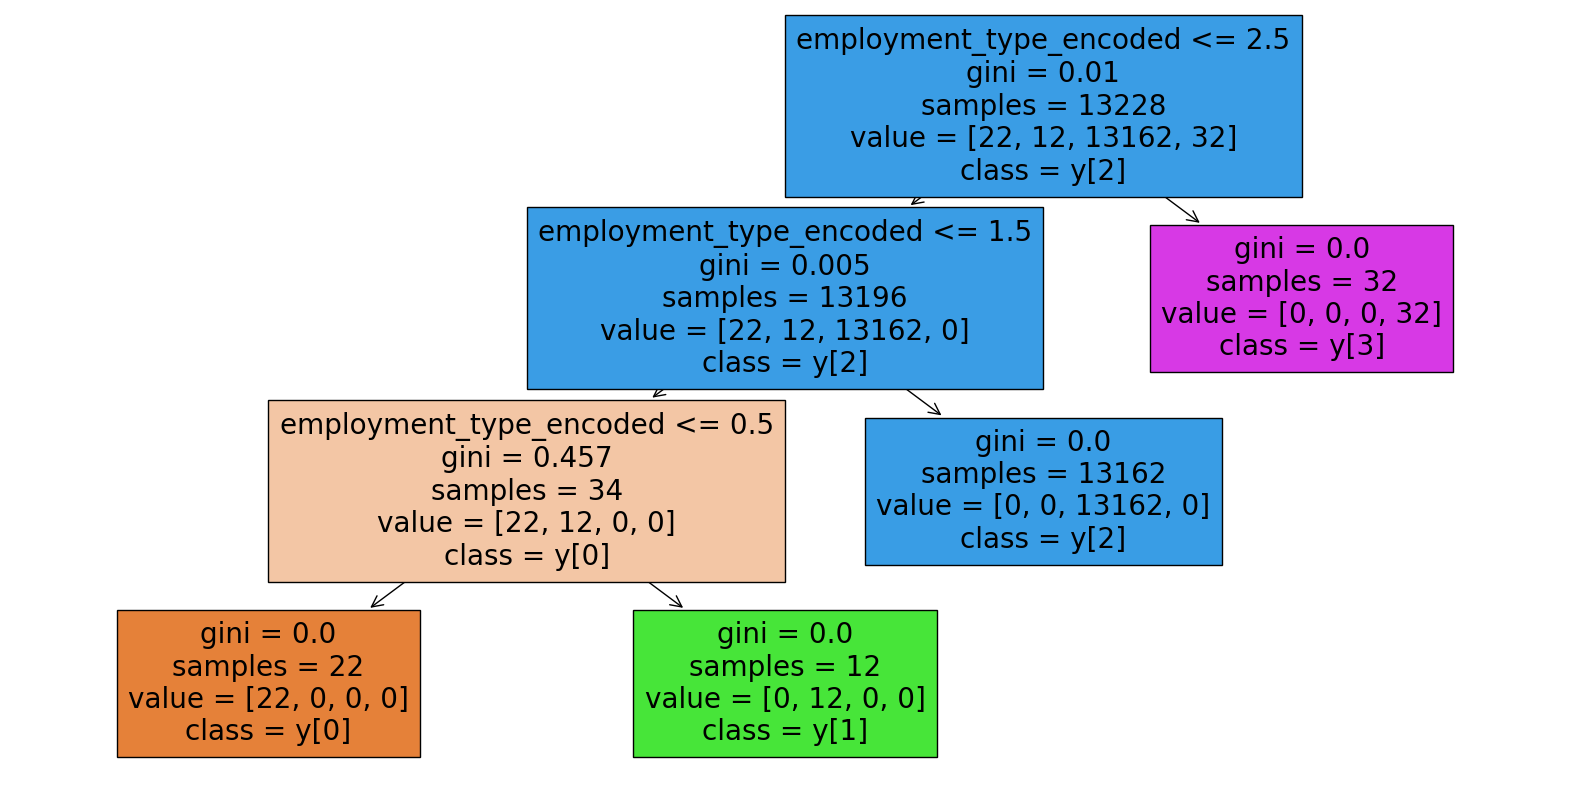

In [10]:
plt.figure(figsize=(20,10))
plot_tree(dt_clf, feature_names=X.columns, class_names=True, filled=True)
plt.show()

# Визуализируем структуру модели Decision Tree с настройкой гиперпараметров

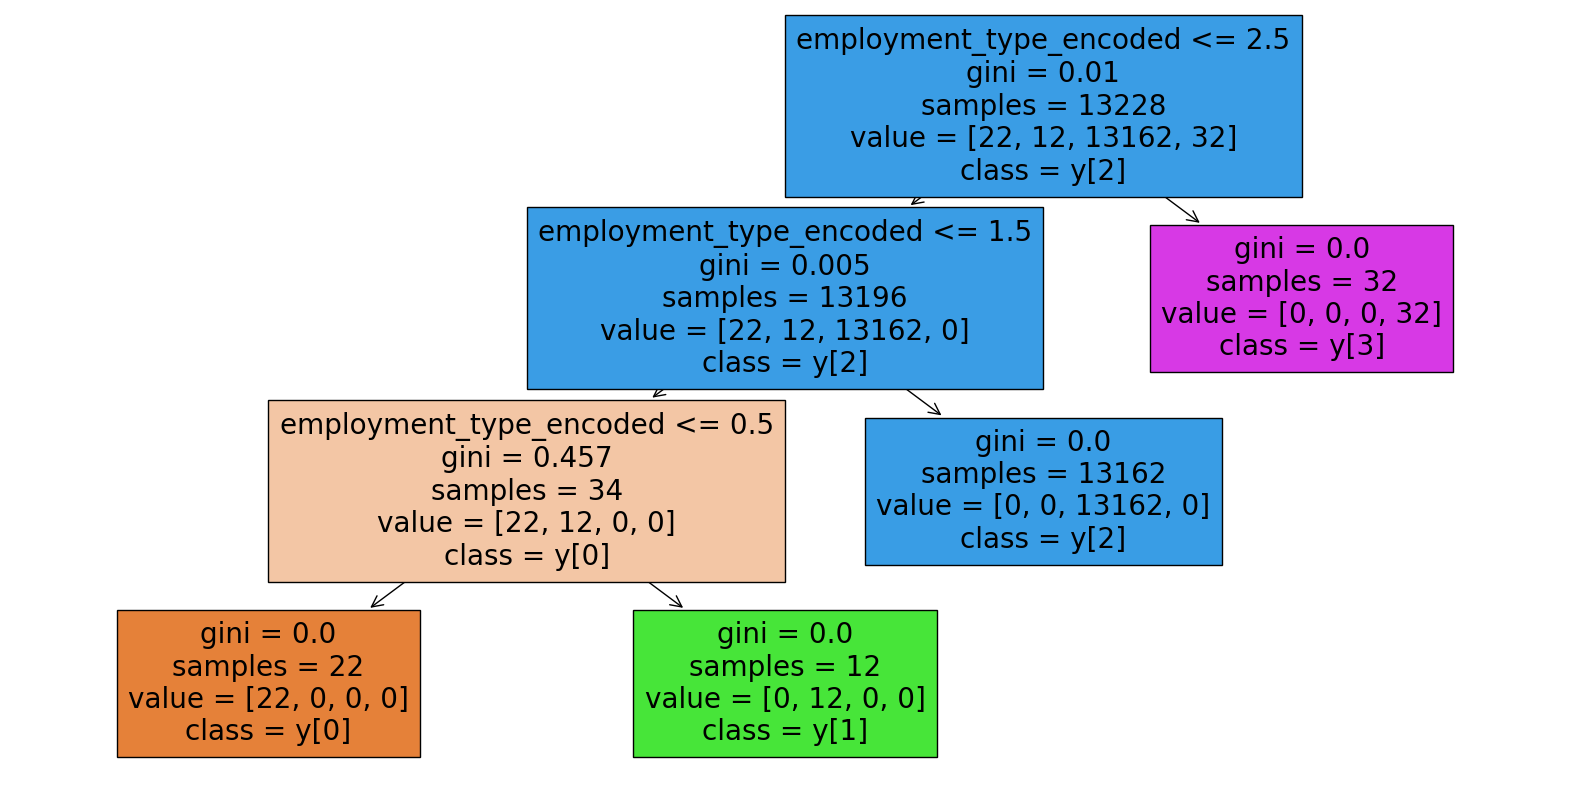

In [11]:
plt.figure(figsize=(20,10))
plot_tree(best_dt_clf, feature_names=X.columns, class_names=True, filled=True)
plt.show()